# Kings County Housing Prices Bakeoff


## Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
import folium
import geopandas as gpd

pd.set_option('display.max_columns', 50, 'display.max_rows', 200)

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis 
    
A quick look at the data to inspect columns and shape. 

In [5]:

city_df = pd.read_csv("with_cities.csv")

print(city_df.shape)
city_df.head()

(17290, 25)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geom,county,city
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,"47.4388,-122.162",King County,Fairwood
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,"47.6784,-122.285",King County,Seattle
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,"47.5646,-122.129",King County,Bellevue
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,"47.6995,-122.228",King County,Kirkland
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,"47.6647,-122.083",King County,Redmond


In [6]:
#Drop first column from DataFrame
city_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
#Take a look at descriptive statistics
city_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


Some brief exploration into features to see their affect and correlation with price.

In [8]:
city_df.groupby('waterfront')['price'].mean()

waterfront
0    5.315051e+05
1    1.688486e+06
Name: price, dtype: float64

In [9]:
city_df.corr().loc['waterfront','price']

0.2757786708046838

## Data Visualizations

This heatmap displays the average housing prices by location in King county. Below you will see that there is a cluster of locations that are home to the more expensive housing prices.

In [10]:
#read in shapefile of King County, WA
nb = '/Users/sandrawelbeck/Desktop/Flatiron_DS_Bootcamp/nyc-mhtn-ds-102620-lectures/Phase_2/Phase2_project/tl_2019_53033_faces/tl_2019_53033_faces.shp'
regions = gpd.read_file(nb)

#change dtype of column that contains zipcode in shapefile
regions.ZCTA5CE10 = pd.to_numeric(regions.ZCTA5CE10, errors='coerce')

#change column name to prep for merge
regions["zipcode"] = regions["ZCTA5CE10"] 

#subset df to show mean prices
plotprice = city_df.groupby("zipcode").price.mean()

#merge shapefile and newly created df
regions2 = regions.join(plotprice, on='zipcode', how='left')

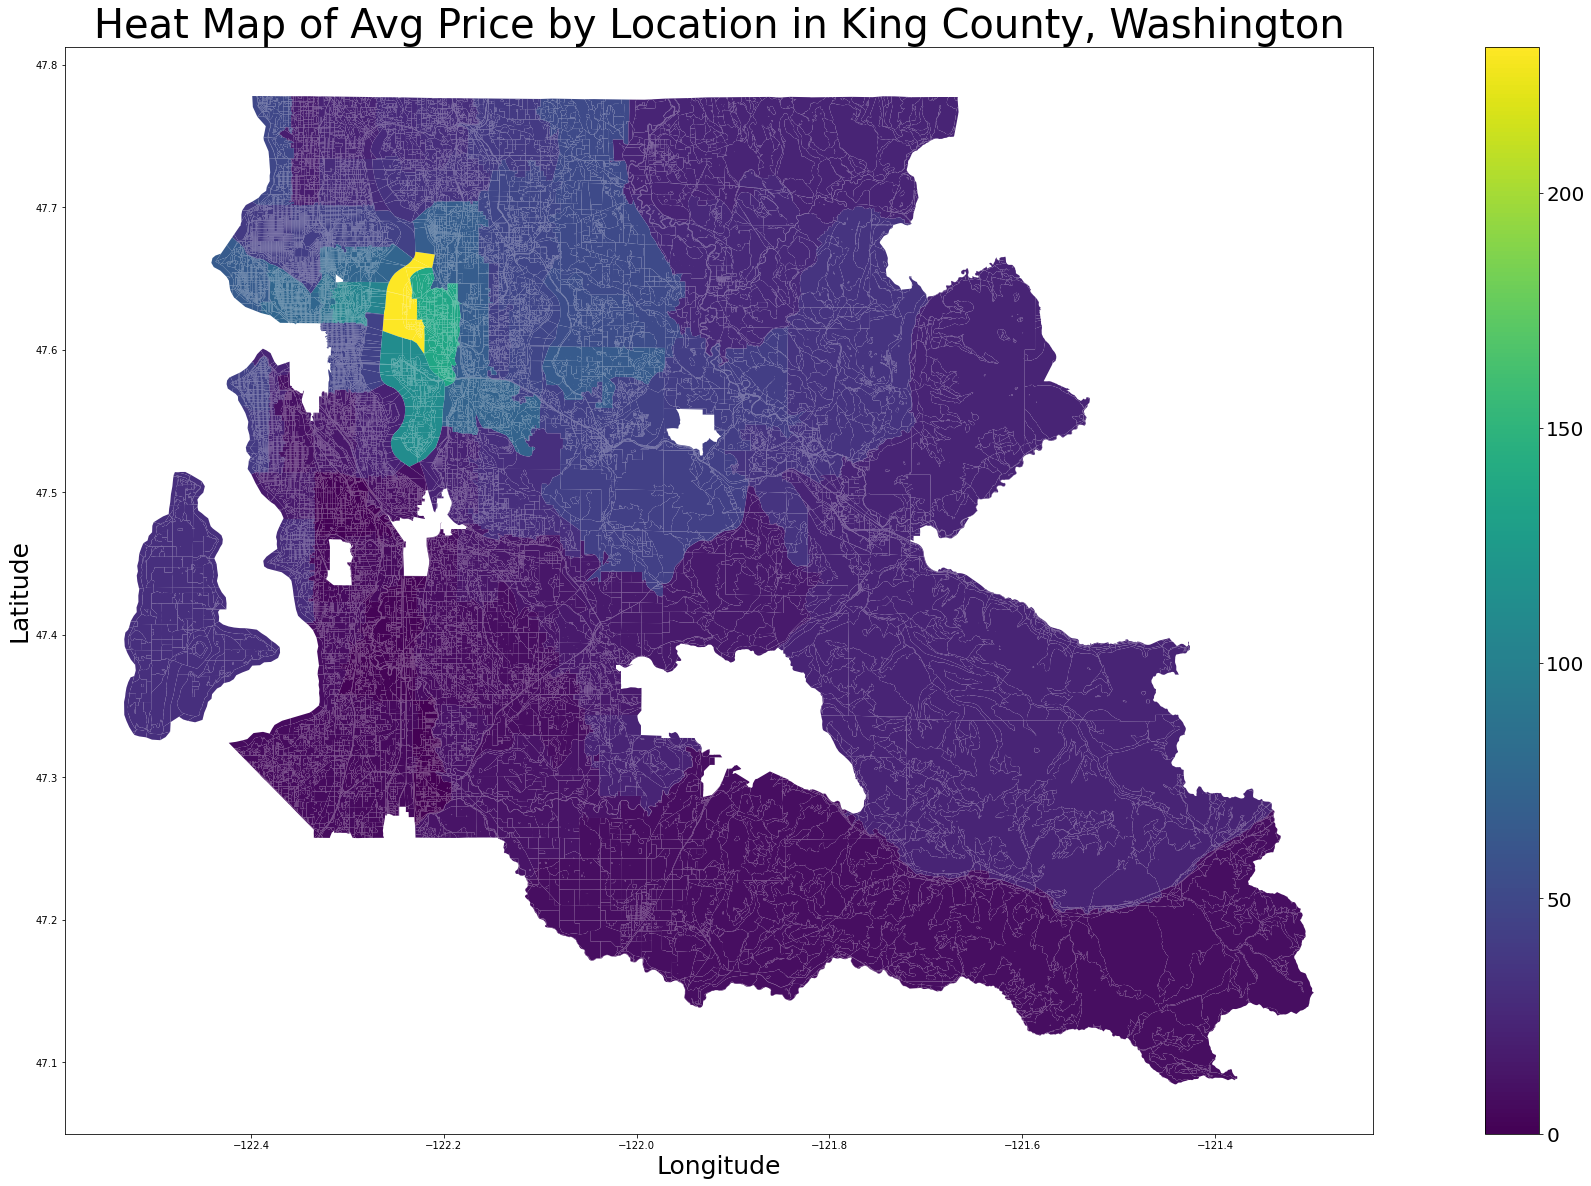

In [11]:
#import graphing modules
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import descartes
import libpysal 
import mapclassify

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.set_title('Heat Map of Avg Price by Location in King County, Washington', fontdict={'fontsize': '40', 'fontweight' : '3'})
ax.set_xlabel('Longitude', fontsize = '25')
ax.set_ylabel('Latitude', fontsize = '25')


vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

regions2.plot('price',ax=ax,figsize=(40,20))
plt.show()

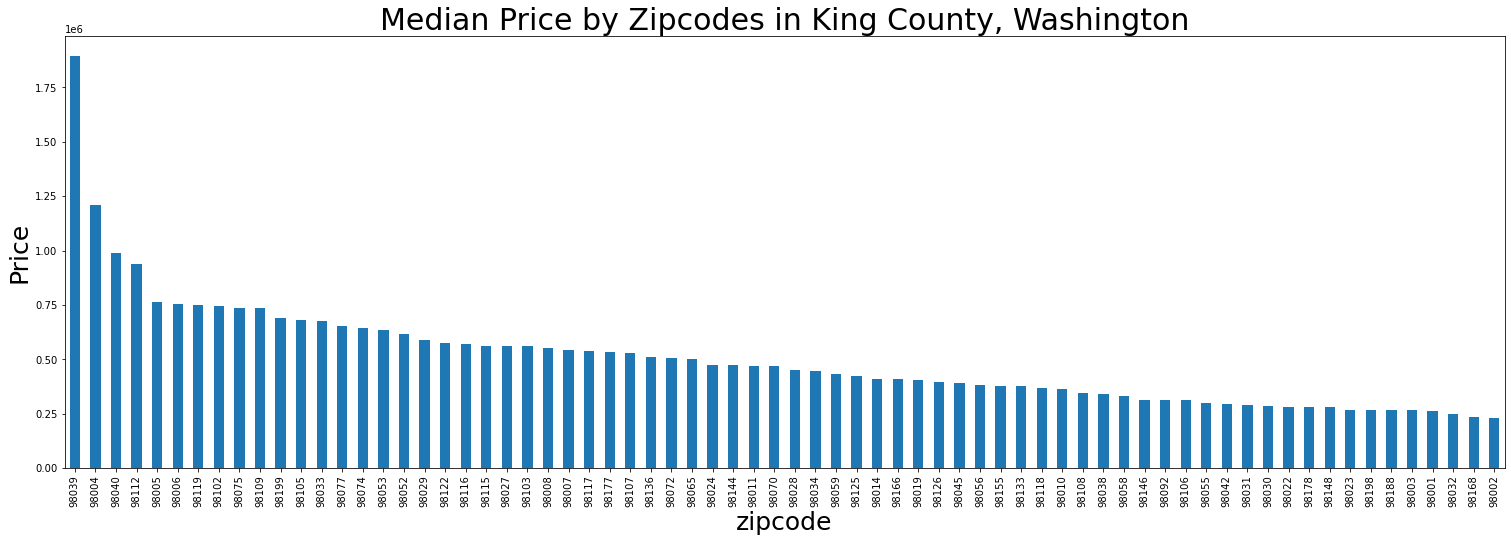

In [12]:
#barplot to show the different price medians in each zipcode

fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
city_price = city_df.groupby('zipcode')['price'].median().sort_values(ascending=False)

ax.set_title('Median Price by Zipcodes in King County, Washington', fontdict={'fontsize': '30', 'fontweight' : '3'})
ax.set_xlabel('Zipcode', fontsize = '25')
ax.set_ylabel('Price', fontsize = '25')

x = city_df['zipcode']
y = city_df['price']

city_price.plot(kind='bar')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

plt.show()

Text(0.5, 0, 'Bathrooms')

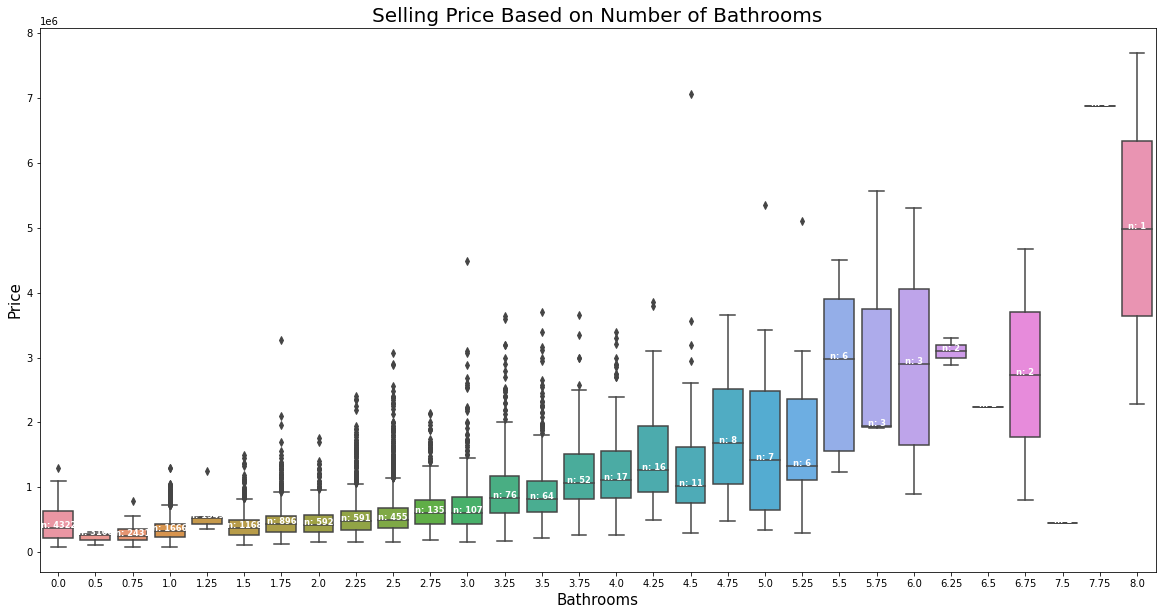

In [13]:
#Sales prices based on # of bathrooms to determine if it is significant

plt.figure(figsize=(20,10))
ax = sns.boxplot(x=city_df['bathrooms'], y=city_df['price'], data=city_df)

# Calculate number of obs per group & median to position labels
medians = city_df.groupby(['bathrooms'])['price'].median().values
nobs = city_df['bathrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
plt.title('Selling Price Based on Number of Bathrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)

<AxesSubplot:xlabel='grade'>

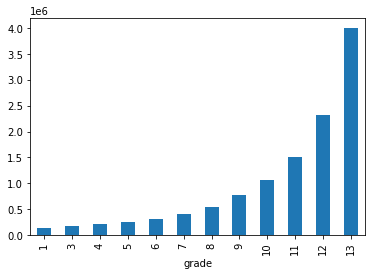

In [14]:
# This barplot shows the apparent affect of grade on housing sale prices

city_df.groupby('grade')['price'].mean().plot(kind='bar')

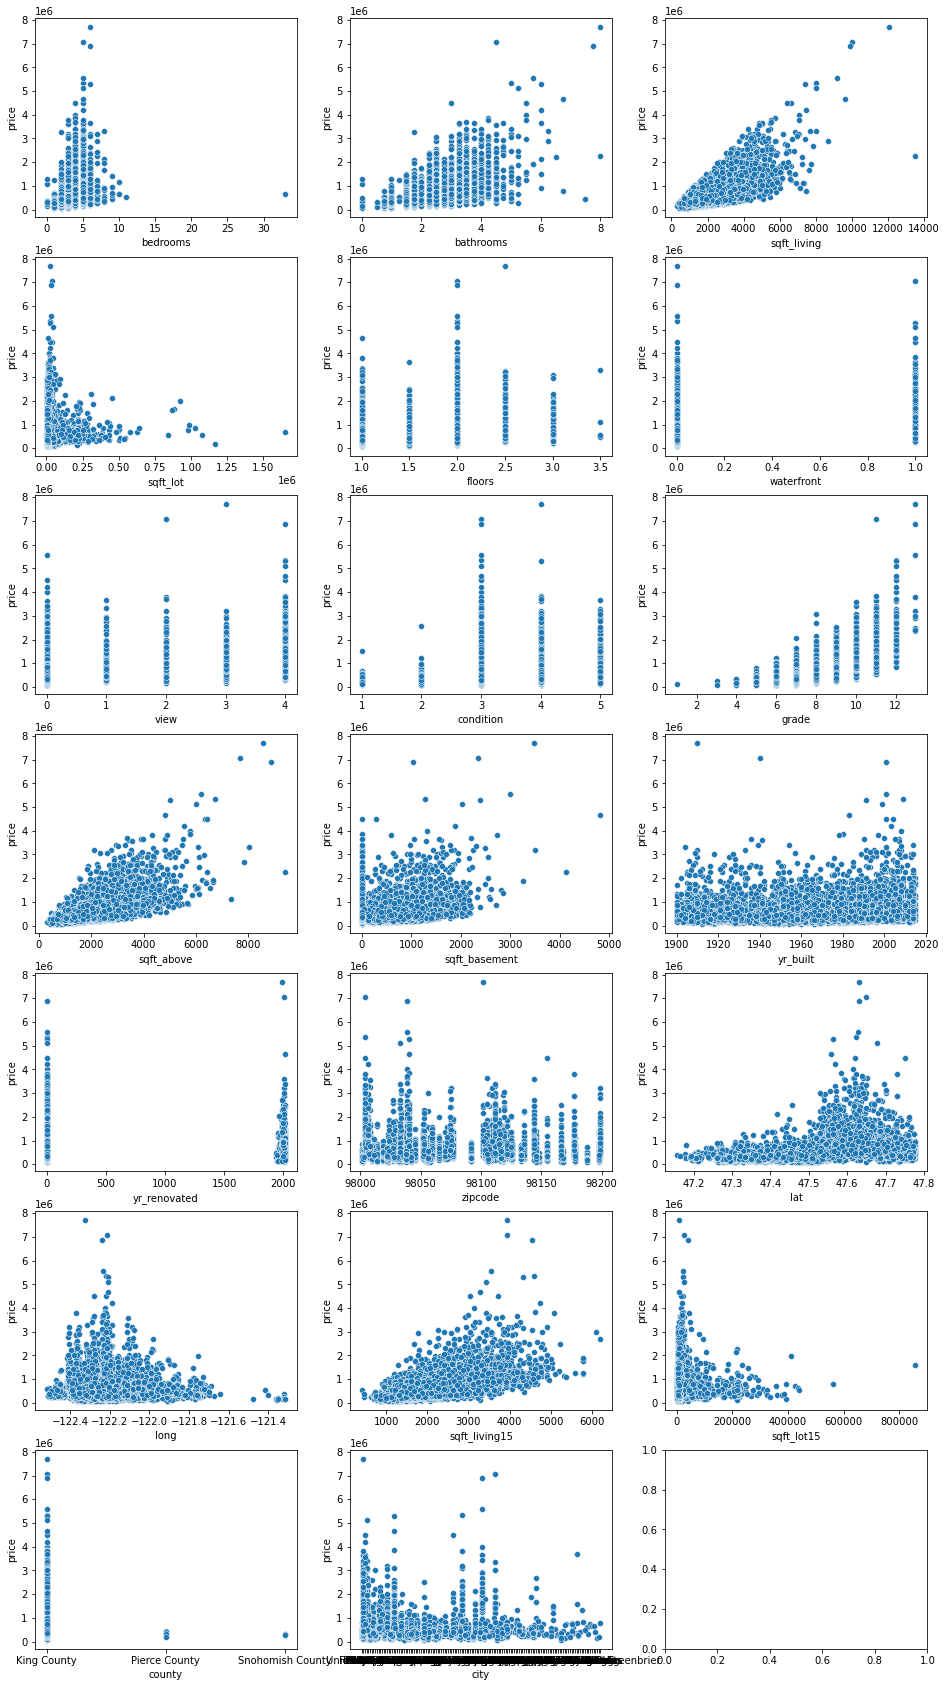

In [15]:
#Scatterplot to get general overview of data with target

leave_out = ['id','date','month','year','price','geom']
for_plot = [x for x in city_df.columns if x not in leave_out]

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=city_df, x=column, y='price', ax=axes[i//3, i%3])

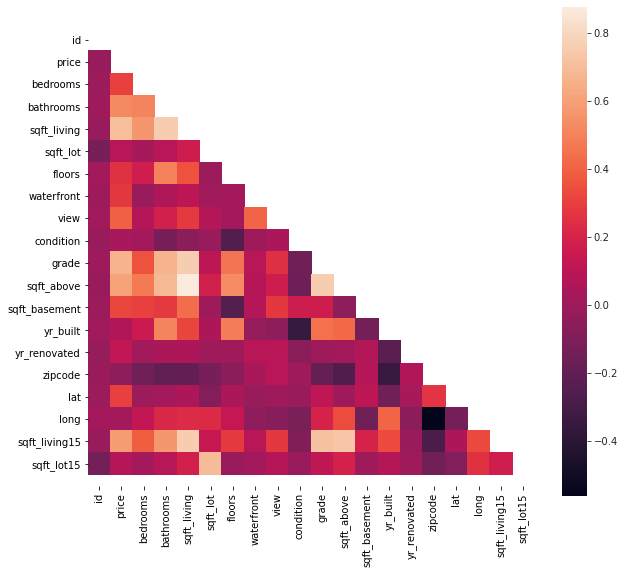

In [16]:
#Correlation heatmap
# Set up  matplotlib figure 
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/useless values
mask = np.zeros_like(city_df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(city_df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Data Cleaning



In [17]:
#Replace 33 bedrooms with 3 as it was a typo
city_df['bedrooms'] = city_df['bedrooms'].replace({33:3})

In [18]:
#Create new yr_renovated column removing 0 values in yr_renovated column to an actual year(yr_built)
city_df['yr_renovated2'] = np.where(city_df['yr_renovated']==0, city_df['yr_built'], city_df['yr_renovated'])

In [19]:
#Change date column to datetime type and create two additional columns for month and year sold
city_df['date'] = pd.to_datetime(city_df['date']) #turn date column to date type
city_df['month'] = pd.DatetimeIndex(city_df.loc[:,'date']).month #Create month column
city_df['year'] = pd.DatetimeIndex(city_df.loc[:,'date']).year #create year column

Some additional exploration of correlation

In [20]:
city_df.corr().loc['sqft_living','price']

0.7035403039789652

In [21]:
city_df.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated2,month,year
id,1.000000,-0.015644,-0.000143,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,0.008698,-0.014844,0.012953
price,-0.015644,1.000000,0.313775,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.104812,-0.004350,-0.002334
bedrooms,-0.000143,0.313775,1.000000,0.524033,0.588536,0.030674,0.179908,-0.008668,0.082724,0.021376,0.366405,0.488420,0.307873,0.159936,0.014489,-0.152831,-0.003991,0.129593,0.401073,0.028038,0.168762,0.002985,-0.010211
bathrooms,0.003833,0.524335,0.524033,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.536815,0.012950,-0.030045
sqft_living,-0.014251,0.703540,0.588536,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.342839,0.017737,-0.033606
sqft_lot,-0.129837,0.086803,0.030674,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.052918,-0.001722,0.003141
floors,0.017126,0.256985,0.179908,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.498899,0.019629,-0.024641
waterfront,0.000101,0.275779,-0.008668,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.005262,0.005685,-0.000824
view,0.012594,0.395485,0.082724,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,-0.020531,-0.004189,0.000701
condition,-0.014272,0.036099,0.021376,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,-0.392758,0.017099,-0.044871


## Feature Engineering

Features that were engineered include, property age, propoerty age when sold, years since renovation, whether the home has a basement, whether the home has a view, whether the house was newly built, whether the home has charm (built a long time ago, but renovated recently), and a grade feature.

In [22]:
city_df['property_age'] = 2020 - city_df['yr_built']

In [23]:
city_df['property_age_when_sold'] = city_df['year'] - city_df['yr_built']

In [24]:
city_df['yrs_since_reno'] = 2020 - city_df['yr_renovated2']

In [25]:
city_df['yrs_btwn_built_reno'] = city_df['yr_renovated2'] - city_df['yr_built']

In [26]:
city_df['has_basement'] = np.where(city_df['sqft_basement']==0, 0, 1)

In [27]:
city_df['has_view'] = np.where(city_df['view']==0, 0, 1)

In [28]:
city_df['newly_built'] = np.where(city_df['yr_built']>=2010, 1, 0)

In [29]:
city_df['charm'] = np.where((city_df['yr_built']<=1977) & (city_df['yr_renovated2']>=2010), 1, 0)

In [30]:
city_df['grade_exp'] = np.exp(city_df['grade'])

<AxesSubplot:xlabel='newly_built', ylabel='price'>

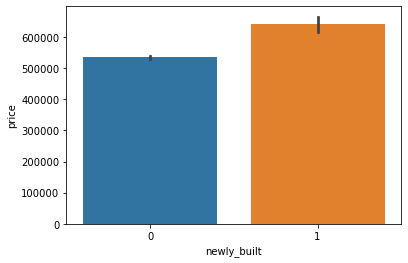

In [31]:
# Barplot displaying difference in sales between newly built and not newly built homes.
sns.barplot(data=city_df,x=city_df['newly_built'],y='price')

<AxesSubplot:xlabel='charm', ylabel='price'>

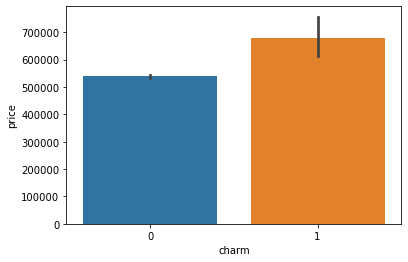

In [32]:
# Barplot displaying difference in sales between homes with and without charm.
sns.barplot(data=city_df,x=city_df['charm'],y='price')

## Statistical Tests

### Two-Sample t-test to compare price of 'charm' to no charm

Null Hypothesis: The mean property values of homes with charm is equal to the mean property value of homes with no charm.

Alternative Hypothesis: The mean property values of homes with charm is not equal to the mean property value of homes with no charm.

In [33]:
ch1 = city_df.groupby('charm')['price'].get_group(0)
ch2 = city_df.groupby('charm')['price'].get_group(1)

In [34]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
# calculate means
    mean1, mean2 = mean(data1), mean(data2)
# calculate standard errors
    se1, se2 = sem(data1), sem(data2)
# standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
    t_stat = (mean1 - mean2) / sed
# degrees of freedom
    degf = len(data1) + len(data2) - 2
# calculate the critical value
    cv = t.ppf(1.0 - alpha, degf)
# calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), degf)) * 2.0
# return everything
    return t_stat, degf, cv, p


# calculate the t test
alpha = 0.05
t_stat, degf, cv, p = independent_ttest(ch1, ch2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-3.880, df=17288, cv=1.645, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [35]:
#repeat of test using scipy
stats.ttest_ind(ch1, ch2, equal_var=False)

Ttest_indResult(statistic=-3.8800009248240555, pvalue=0.0001603282109860667)

### Two sample t-test to compare newly built and non-newly built homes

Null Hypothesis: The mean property value of newly built homes is equal to the mean property value of homes that are not newly built.

Alternative Hypothesis: The mean property value of newly built homes is not equal to the mean property value of homes that are not newly built.

In [36]:
new1 = city_df.groupby('newly_built')['price'].get_group(0)
new2 = city_df.groupby('newly_built')['price'].get_group(1)

In [37]:
# calculate the t test
alpha = 0.05
t_stat, degf, cv, p = independent_ttest(new1, new2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-8.328, df=17288, cv=1.645, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [38]:
#repeat of test using scipy stats
stats.ttest_ind(new1, new2, equal_var=False)

Ttest_indResult(statistic=-8.328070462523947, pvalue=2.43081170151593e-16)

In [39]:
city_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geom,county,city,yr_renovated2,month,year,property_age,property_age_when_sold,yrs_since_reno,yrs_btwn_built_reno,has_basement,has_view,newly_built,charm,grade_exp
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,"47.4388,-122.162",King County,Fairwood,1986,10,2014,34,28,34,0,0,0,0,0,2980.957987
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,"47.6784,-122.285",King County,Seattle,1977,8,2014,43,37,43,0,1,0,0,0,2980.957987
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,"47.5646,-122.129",King County,Bellevue,1997,8,2014,23,17,23,0,0,1,0,0,59874.141715
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,"47.6995,-122.228",King County,Kirkland,1990,3,2015,30,25,30,0,0,1,0,0,162754.791419
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,"47.6647,-122.083",King County,Redmond,2004,7,2014,16,10,16,0,0,0,0,0,8103.083928


In [40]:
city_df['yrs_btwn_built_reno'].describe()

count    17290.000000
mean         2.365992
std         12.307759
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        114.000000
Name: yrs_btwn_built_reno, dtype: float64

Additional visualization

In [99]:
# leave_out = ['id','date','month','year','price']
# for_plot = [x for x in city_df.columns if x not in leave_out]

# fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(16,30))

# for i, column in enumerate(for_plot):
#     sns.scatterplot(data=city_df, x=column, y='price', ax=axes[i//3, i%3])

### One Way ANOVA

Null Hypothesis: There are no significant differences in average home value between different cities in King County. 

Alternative Hypothesis: There is a significant difference in average home value between different cities in King County.

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(city)', data=city_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

if aov_table["PR(>F)"][0] < alpha:
    print("Different cities have a statistically significant impact on average property value")
    print("City ANOVA F-statisic Probability: ", aov_table["PR(>F)"][0])
    
aov_table

Top 5 ranked zipcode have a statistically significant impact on average property value
Zipcdoe ANOVA F-statisic Probability:  0.0


,sum_sq,df,F,PR(>F)
C(city),7.748920e+14,141.0,57.652404,0.0
Residual,1.634625e+15,17148.0,NaN,NaN


Given the low F-stat, we reject the null hypothesis that there is no difference in avg home prices per city, in favor of the alternative hypothesis that shows city locations do have an impact on the property value in King County.

In [43]:
import researchpy as rp

city_df.price.describe()

rp.summary_cont(city_df['price'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,price,17290.0,540739.5486,373318.9787,2839.1123,535174.6012,546304.4961


In [44]:
rp.summary_cont(city_df['price'].groupby(city_df['city']))

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
city,,,,,,
Algona,20,2.009595e+05,4.880578e+04,10913.3047,1.781177e+05,2.238013e+05
Ames Lake,51,6.660315e+05,3.300813e+05,46220.6272,5.731947e+05,7.588684e+05
Auburn,429,2.868293e+05,9.493695e+04,4583.5989,2.778201e+05,2.958384e+05
Avondale,1,1.325000e+06,NaN,NaN,NaN,NaN
Baring,1,1.700000e+05,NaN,NaN,NaN,NaN
Beaux Arts Village,4,1.248250e+06,2.571425e+05,128571.2351,8.390789e+05,1.657421e+06
Bellevue,1040,8.293565e+05,4.648377e+05,14414.0052,8.010727e+05,8.576404e+05
Black Diamond,48,3.646593e+05,1.731857e+05,24997.2059,3.143714e+05,4.149472e+05
Bothell,167,4.881809e+05,1.260191e+05,9751.6479,4.689277e+05,5.074341e+05


In [45]:
stats.f_oneway(city_df['price'][city_df['city'] == 'Medina'],
               city_df['price'][city_df['city'] == 'Clyde Hill'],
               city_df['price'][city_df['city'] == 'Yarrow Point'],
               city_df['price'][city_df['city'] == 'Hunts Point'],
               city_df['price'][city_df['city'] == 'Avondale'],
               city_df['price'][city_df['city'] == 'High Point'],
               city_df['price'][city_df['city'] == 'Beaux Arts Village'],
               city_df['price'][city_df['city'] == 'Mercer Island'],
               city_df['price'][city_df['city'] == 'Tibbetts Station'],
               city_df['price'][city_df['city'] == 'River Si Estates'],
               city_df['price'][city_df['city'] == 'Inglewood'],
               city_df['price'][city_df['city'] == 'Franklin'],
               city_df['price'][city_df['city'] == 'Cougar Hills'],
               city_df['price'][city_df['city'] == 'Earlmont'],
               city_df['price'][city_df['city'] == 'Coal Creek'],
               city_df['price'][city_df['city'] == 'South Firs'],
               city_df['price'][city_df['city'] == 'Sunridge at Elk Run'],
               city_df['price'][city_df['city'] == 'Bellevue'])

F_onewayResult(statistic=28.0597316991041, pvalue=6.442152986540646e-77)

In [46]:
stats.f_oneway(city_df['price'][city_df['city'] == 'Medina'],
               city_df['price'][city_df['city'] == 'Clyde Hill'],
               city_df['price'][city_df['city'] == 'Yarrow Point'],
               city_df['price'][city_df['city'] == 'Hunts Point'],
               city_df['price'][city_df['city'] == 'Avondale'],
               city_df['price'][city_df['city'] == 'High Point'],
               city_df['price'][city_df['city'] == 'Beaux Arts Village'],
               city_df['price'][city_df['city'] == 'Mercer Island'],
               city_df['price'][city_df['city'] == 'Tibbetts Station'],
               city_df['price'][city_df['city'] == 'River Si Estates'])

F_onewayResult(statistic=9.383450664741082, pvalue=9.748249331392503e-13)

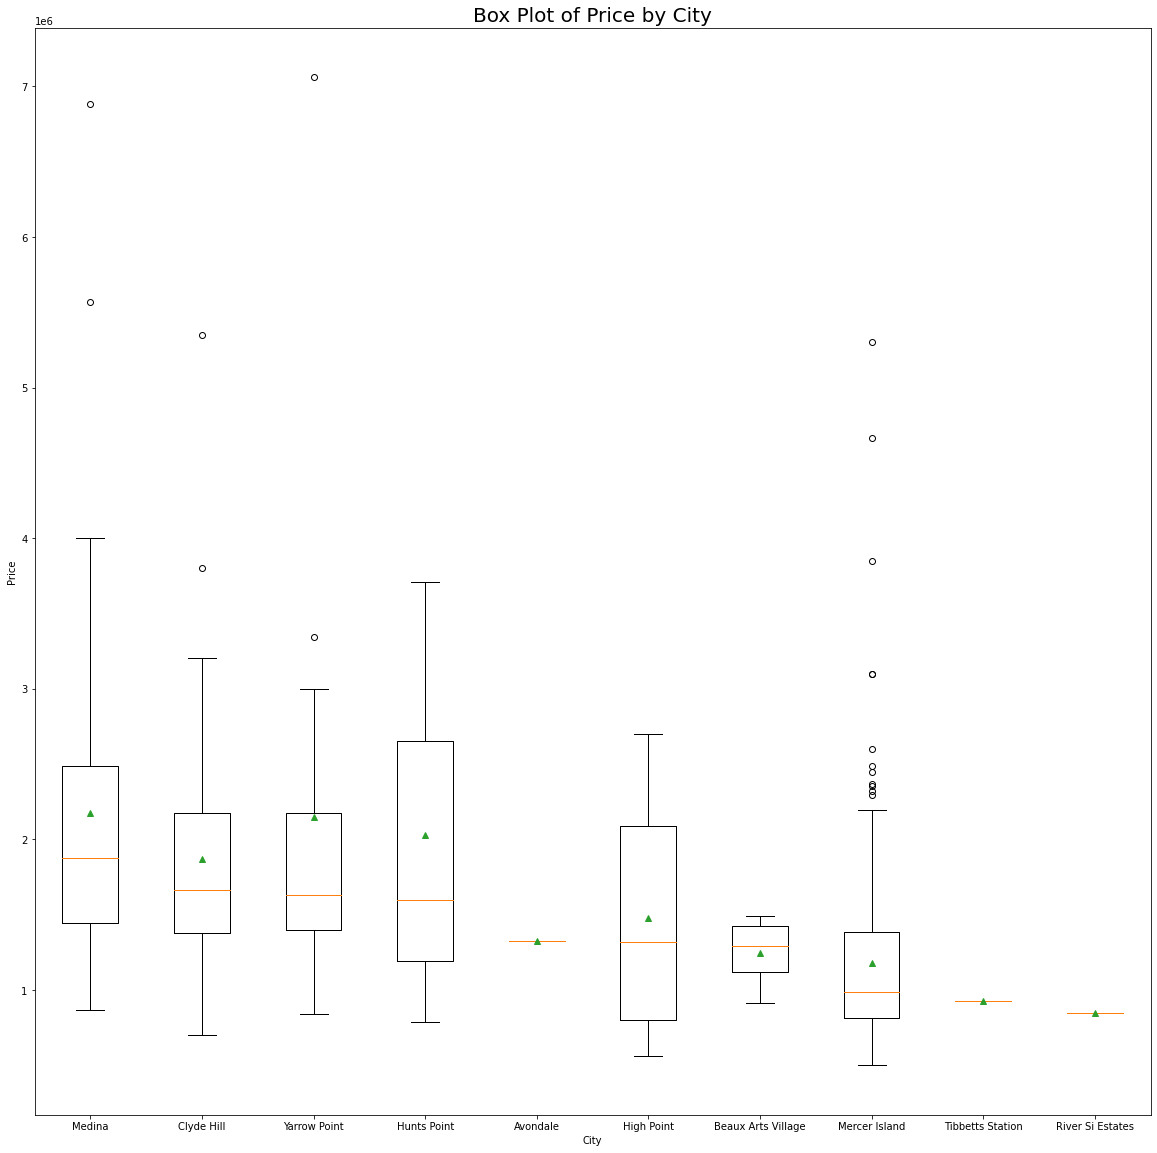

In [47]:
fig = plt.figure(figsize= (20, 20))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Price by City", fontsize= 20)
ax.set

data = [city_df['price'][city_df['city'] == 'Medina'],
        city_df['price'][city_df['city'] == 'Clyde Hill'],
        city_df['price'][city_df['city'] == 'Yarrow Point'],
        city_df['price'][city_df['city'] == 'Hunts Point'],
        city_df['price'][city_df['city'] == 'Avondale'],
        city_df['price'][city_df['city'] == 'High Point'],
        city_df['price'][city_df['city'] == 'Beaux Arts Village'],
        city_df['price'][city_df['city'] == 'Mercer Island'],
        city_df['price'][city_df['city'] == 'Tibbetts Station'],
        city_df['price'][city_df['city'] == 'River Si Estates']]

ax.boxplot(data,
           labels=['Medina', 'Clyde Hill', 'Yarrow Point',
                   'Hunts Point', 'Avondale', 'High Point',
                   'Beaux Arts Village', 'Mercer Island',
                   'Tibbetts Station', 'River Si Estates'],
           showmeans= True)

plt.xlabel("City")
plt.ylabel("Price")

plt.show()

The F-stats above further prove that the city location does have an impact on housing sales.

In [48]:
mlr_model = ols(formula='price~grade_exp+sqft_living+sqft_lot+property_age+newly_built+charm', data=city_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4373.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:53:07   Log-Likelihood:            -2.3838e+05
No. Observations:               17290   AIC:                         4.768e+05
Df Residuals:                   17283   BIC:                         4.768e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.203e+05   6846.255    -17.578      0.000   -1.34e+05   -1.07e+05
grade_exp        6.9122      0.122     56.518      0.000       6.672       7.152
sqft_living    238.4996      2.448     97.436      0.000     233.702     243.297
sqft_lot        -0.2645      0.043     -6.146      0.000      -0.349      -0.180
property_age  2532.8636     68.643     36.899      0.000    2398.317    2667.410
newly_built   9.431e+04   8286.839     11.380      0.000    7.81e+04    1.11e+05
charm         6.876e+04   2.01e+04      3.414      0.001    2.93e+04    1.08e+05
==============================================================================
Omnibus:                     9455.733   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305006.500
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      23.166   Cond. No.                     5.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Creation of Dummy Variables for Zipcodes with the Top 10 Sales Means

In [49]:
city_df.groupby('zipcode')['price'].mean().describe()

count    7.000000e+01
mean     5.627514e+05
std      3.079475e+05
min      2.322865e+05
25%      3.547935e+05
50%      4.950228e+05
75%      6.447316e+05
max      2.202790e+06
Name: price, dtype: float64

In [50]:
city_df.groupby('zipcode')['price'].mean().sort_values(ascending = False).head(10)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
Name: price, dtype: float64

In [51]:
dummy_zip = pd.get_dummies(city_df['zipcode'], drop_first=False)
dummy_zip.reset_index(inplace=True)
dummy_zip = dummy_zip.add_prefix("{}#".format('zipcode'))
dummy_zip = dummy_zip[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040','zipcode#98119', 'zipcode#98105','zipcode#98006','zipcode#98005']]

In [52]:
city_df.drop('zipcode', axis=1, inplace=True)
city_df = city_df.join(dummy_zip)

In [53]:
dummy_grade = pd.get_dummies(city_df['grade'])
dummy_grade = dummy_grade.add_prefix("{}#".format('grade'))
city_df = city_df.join(dummy_grade)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [54]:
#your code here
city_df['yrs_since_sold'] = 2020 - city_df['year']

## Polynomial Feature Creation

In [55]:
# your code here
city_df['sqft_living_lot']= city_df['sqft_living']*city_df['sqft_lot']

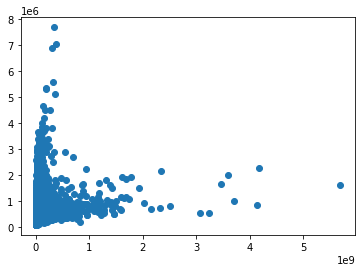

In [56]:
plt.scatter(city_df['sqft_living_lot'], city_df['price'])

## Train-Test Split


### 5.1) Perform a train-test split of the data.

In [57]:
#your code here 
features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 
                 'floors', 'waterfront', 'view', 'condition', 'grade','grade_exp',
                 'has_basement','property_age' ,'zipcode#98004', 
                 'zipcode#98102', 'zipcode#98109', 'zipcode#98112','zipcode#98039',
                 'zipcode#98040', 'zipcode#98119', 'zipcode#98105', 'zipcode#98006',
                 'zipcode#98005']

In [58]:
city_df[features].isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
grade_exp        0
has_basement     0
property_age     0
zipcode#98004    0
zipcode#98102    0
zipcode#98109    0
zipcode#98112    0
zipcode#98039    0
zipcode#98040    0
zipcode#98119    0
zipcode#98105    0
zipcode#98006    0
zipcode#98005    0
dtype: int64

In [59]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(city_df[features], city_df['price'], random_state=75,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 22) Target:  (13832,)
Training set - Features:  (3458, 22) Target:  (3458,)


### Fitting scaler to training data

In [61]:
scaler = StandardScaler()

#fit the scaler and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=city_df[features].columns)

### Transform the testing set with the scaler.

In [62]:
#your code here 
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=city_df[features].columns)

### Fit the model to the training data.

In [63]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 184923.35958388072


### Predicting on training set

In [64]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

In [65]:
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


Testing Root Mean Squared Error: 171265.45224118335


In [66]:
 
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print ("R^2 Score:", lm.score(X_train, y_train))

Training:  184923 vs. Testing:  171265
R^2 Score: 0.7648390896448194


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


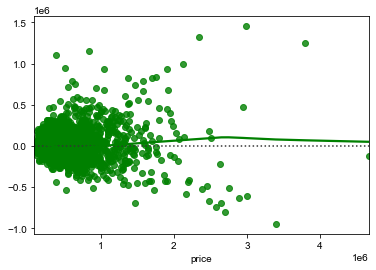

In [67]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")
sns.set(rc={'figure.figsize':(11.7,11.27)})

In [68]:
#take the natural log of the target variable
y_log = np.log(y_train)

#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 664512.9597361357


## Feature Selection Techniques

### Polynomial 2

In [69]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(city_df[features])
poly2_columns = poly_2.get_feature_names(features)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,grade_exp,has_basement,property_age,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,zipcode#98005,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,...,zipcode#98112 zipcode#98119,zipcode#98112 zipcode#98105,zipcode#98112 zipcode#98006,zipcode#98112 zipcode#98005,zipcode#98039^2,zipcode#98039 zipcode#98040,zipcode#98039 zipcode#98119,zipcode#98039 zipcode#98105,zipcode#98039 zipcode#98006,zipcode#98039 zipcode#98005,zipcode#98040^2,zipcode#98040 zipcode#98119,zipcode#98040 zipcode#98105,zipcode#98040 zipcode#98006,zipcode#98040 zipcode#98005,zipcode#98119^2,zipcode#98119 zipcode#98105,zipcode#98119 zipcode#98006,zipcode#98119 zipcode#98005,zipcode#98105^2,zipcode#98105 zipcode#98006,zipcode#98105 zipcode#98005,zipcode#98006^2,zipcode#98006 zipcode#98005,zipcode#98005^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2980.957987,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,9.0,8280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,2980.957987,1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,15.0,14500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,59874.141715,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,10.0,15080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,162754.791419,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.5,13680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.50,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,8103.083928,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.5,7650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, city_df['price'], random_state=75,test_size=0.2)

In [71]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 154414.82718838696


In [72]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 170492.46190612446
Training:  154414 vs. Testing:  170492


### Kbest

In [73]:
X_train.shape

(13832, 275)

In [74]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=200, score_func=<function f_regression at 0x7fb3d1fcbae8>)

In [75]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [76]:
list(removed_columns)

['condition',
 'property_age',
 'zipcode#98109',
 'zipcode#98005',
 'bedrooms zipcode#98005',
 'bathrooms zipcode#98005',
 'sqft_lot^2',
 'sqft_lot property_age',
 'sqft_lot zipcode#98005',
 'floors zipcode#98005',
 'waterfront zipcode#98102',
 'waterfront zipcode#98109',
 'waterfront zipcode#98112',
 'waterfront zipcode#98039',
 'waterfront zipcode#98119',
 'waterfront zipcode#98006',
 'waterfront zipcode#98005',
 'view zipcode#98005',
 'condition^2',
 'condition property_age',
 'condition zipcode#98005',
 'grade zipcode#98005',
 'grade_exp zipcode#98005',
 'has_basement zipcode#98109',
 'has_basement zipcode#98005',
 'property_age^2',
 'property_age zipcode#98109',
 'property_age zipcode#98005',
 'zipcode#98004 zipcode#98102',
 'zipcode#98004 zipcode#98109',
 'zipcode#98004 zipcode#98112',
 'zipcode#98004 zipcode#98039',
 'zipcode#98004 zipcode#98040',
 'zipcode#98004 zipcode#98119',
 'zipcode#98004 zipcode#98105',
 'zipcode#98004 zipcode#98006',
 'zipcode#98004 zipcode#98005',
 'zip

In [77]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'grade',
 'grade_exp',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms grade_exp',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms grade_exp',
 'bathrooms has_bas

In [78]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 155968.1208851284
Testing Root Mean Squared Error: 172136.25647281937


In [79]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  170492.46190612446 
 KBest:    172136.25647281937 



### RFE

In [80]:
len(selected_columns)

200

In [81]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)

Fitting estimator with 200 features.
Fitting estimator with 198 features.
Fitting estimator with 196 features.
Fitting estimator with 194 features.
Fitting estimator with 192 features.
Fitting estimator with 190 features.
Fitting estimator with 188 features.
Fitting estimator with 186 features.
Fitting estimator with 184 features.
Fitting estimator with 182 features.
Fitting estimator with 180 features.
Fitting estimator with 178 features.
Fitting estimator with 176 features.
Fitting estimator with 174 features.
Fitting estimator with 172 features.
Fitting estimator with 170 features.
Fitting estimator with 168 features.
Fitting estimator with 166 features.
Fitting estimator with 164 features.
Fitting estimator with 162 features.
Fitting estimator with 160 features.
Fitting estimator with 158 features.


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', step=2, verbose=1)

In [82]:
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]


In [83]:
list(removed_rfe)

['sqft_lot',
 'grade_exp',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms grade_exp',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms grade_exp',
 'sqft_living^2',
 'sqft_living sqft_lot',
 'sqft_living floors',
 'sqft_living view',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living grade_exp',
 'sqft_living property_age',
 'sqft_lot floors',
 'sqft_lot waterfront',
 'sqft_lot view',
 'sqft_lot condition',
 'sqft_lot grade',
 'sqft_lot grade_exp',
 'sqft_lot has_basement',
 'sqft_lot zipcode#98004',
 'sqft_lot zipcode#98039',
 'sqft_lot zipcode#98040',
 'sqft_lot zipcode#98006',
 'floors grade_exp',
 'waterfront grade_exp',
 'view grade_exp',
 'condition grade_exp',
 'grade grade_exp',
 'grade_exp^2',
 'grade_exp has_basement',
 'grade_exp property_age',
 'grade_exp zipcode#98004',
 'grade_exp zipcode#98102',
 'grade_exp zipcode#98109',
 'grade_exp zipcode#98112',
 'grade_exp zipcode#98039',
 'grade_exp zipcode#98040',
 'grade_exp zipcode#98119',
 'gr

In [84]:
print(len(list(selected_rfe)))
list(selected_rfe)

156


['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms has_basement',
 'bathrooms property_age',
 'bathrooms zipcode#98004',
 'bathrooms zipcode#98102',
 'bathrooms zipcode#98109',
 'bathrooms zipcode#98112',
 'bathrooms zipcode#980

In [85]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 159106.867165716
Testing Root Mean Squared Error: 160751.3134928484


In [86]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  170492.46190612446 
 KBest:    172136.25647281937 
 RFE:      160751.3134928484


### Lasso

In [87]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)
# The larger the alpha, the higher the penalty and will push more coefficients down to zero.
#Lasso adds a penalty to large coefficient, so in order for a coefficient to be large, the benefit it adds to the model needs to outweigh that penalty in the loss function
#So a coef will only be big if it does well at predicting the dependent variable

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 110045.538255608
Testing Error: 169948.97915788373


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165861093861400.8, tolerance: 201142293225.56476
  positive)


<AxesSubplot:title={'center':'Modal Coefficients'}>

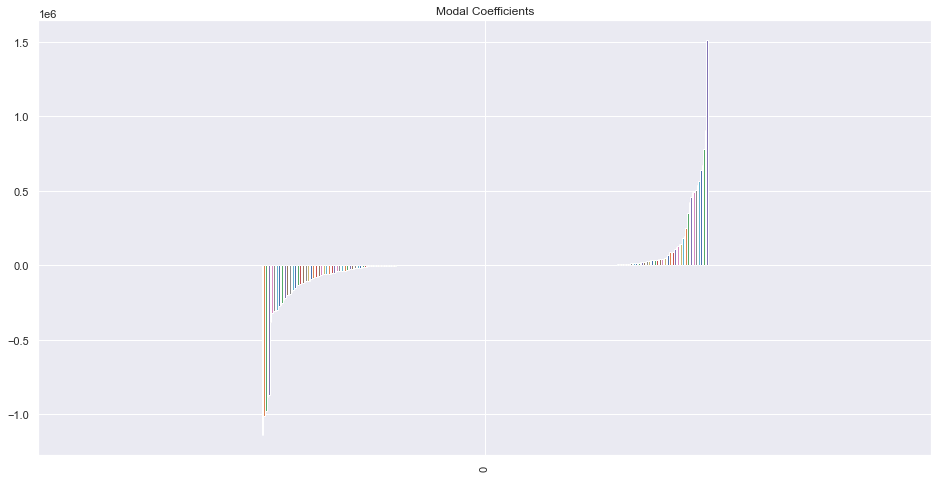

In [88]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [89]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    50
dtype: int64

In [90]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 170492.46190612446 
 KBest: 	 172136.25647281937 
 RFE: 	 	 160751.3134928484 
 Lasso 0.01: 	 169948.97915788373 



Given the RMSEs of the 4 different feature selection techniques used it is clear that the RFE held the best results for my model given the features used. 

## Refitting best model to the entire dataset.

In [91]:
final_scaler = StandardScaler()


#fit and transform the training data
df_final_scaled = pd.DataFrame(data=final_scaler.fit_transform(df_poly2[selected_rfe]), columns=selected_rfe)

In [92]:
df_final_scaled

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,has_basement,zipcode#98004,zipcode#98102,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,bedrooms^2,bedrooms bathrooms,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms has_basement,bedrooms property_age,...,has_basement property_age,has_basement zipcode#98004,has_basement zipcode#98102,has_basement zipcode#98112,has_basement zipcode#98039,has_basement zipcode#98040,has_basement zipcode#98119,has_basement zipcode#98105,has_basement zipcode#98006,property_age zipcode#98004,property_age zipcode#98102,property_age zipcode#98112,property_age zipcode#98039,property_age zipcode#98040,property_age zipcode#98119,property_age zipcode#98105,property_age zipcode#98006,zipcode#98004^2,zipcode#98102^2,zipcode#98112^2,zipcode#98039^2,zipcode#98040^2,zipcode#98119^2,zipcode#98105^2,zipcode#98006^2
0,0.690062,0.179189,-0.012462,0.945804,-0.089698,-0.307685,0.294186,-0.805717,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,0.561072,0.358426,1.166689,-0.085301,-0.293665,1.159010,0.623368,-0.760962,-0.240589,...,-0.673153,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.106586,-0.058387,-0.100725,-0.043405,-0.108929,-0.081858,-0.092965,-0.139096,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912
1,1.786678,1.152641,0.889720,-0.909850,-0.089698,-0.307685,0.294186,1.241131,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,1.887625,1.779787,-0.045185,-0.085301,-0.293665,3.477983,1.482226,1.956983,0.502214,...,0.656163,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.106586,-0.058387,-0.100725,-0.043405,-0.108929,-0.081858,-0.092965,-0.139096,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912
2,0.690062,0.503673,1.835381,0.945804,-0.089698,2.272272,2.848063,-0.805717,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,6.626394,0.561072,0.595320,1.166689,-0.085301,2.430295,0.128355,1.911655,-0.760962,-0.654302,...,-0.673153,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.106586,-0.058387,-0.100725,-0.043405,-0.108929,-0.081858,-0.092965,3.373358,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,6.626394
3,-0.406553,1.801609,2.694084,0.945804,-0.089698,2.272272,3.699356,-0.805717,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,-0.470691,0.713767,0.358773,-0.085301,1.749305,-0.644636,1.052797,-0.760962,-0.673107,...,-0.673153,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.106586,-0.058387,-0.100725,-0.043405,-0.108929,-0.081858,-0.092965,-0.139096,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912
4,-0.406553,0.503673,0.509282,0.945804,-0.089698,-0.307685,1.145478,-0.805717,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,-0.470691,0.003086,0.358773,-0.085301,-0.293665,-0.644636,0.086581,-0.760962,-1.068015,...,-0.673153,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.106586,-0.058387,-0.100725,-0.043405,-0.108929,-0.081858,-0.092965,-0.139096,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1.786678,0.503673,1.259289,-0.909850,-0.089698,0.982294,0.294186,1.241131,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,1.887625,1.187553,-0.045185,-0.085301,1.408810,0.901346,1.482226,1.956983,1.395458,...,1.243535,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.106586,-0.058387,-0.100725,-0.043405,-0.108929,-0.08

In [93]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_rfe.fit(df_final_scaled, city_df['price'])

In [94]:
lm_final.score(df_final_scaled, city_df['price'])

0.8195288208587183

In [95]:
list(selected_rfe)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms has_basement',
 'bathrooms property_age',
 'bathrooms zipcode#98004',
 'bathrooms zipcode#98102',
 'bathrooms zipcode#98109',
 'bathrooms zipcode#98112',
 'bathrooms zipcode#980

## Save final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [96]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [97]:
pickle_out = open('scaler.pickle', "wb")
pickle.dump(final_scaler, pickle_out)
pickle_out.close()

In [98]:
pd.DataFrame(selected_rfe).to_csv('selected_rfe.csv')